In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.formula.api import ols

In [138]:
col_list = ["WorkWeekHrs","YearsCode","ConvertedComp"]
data = pd.read_csv("H:/Software matrics/survey_results_public.csv",usecols=col_list)
#data = data.replace('NA', np.nan)
data.dropna()
#data.head
#list(data.columns.values)
print(data.shape)

(64461, 3)


In [111]:
data['ConvertedComp'].value_counts()

120000.0     341
100000.0     306
150000.0     277
1000000.0    258
2000000.0    258
            ... 
230916.0       1
1135.0         1
348.0          1
132.0          1
44023.0        1
Name: ConvertedComp, Length: 6958, dtype: int64

In [134]:
# data = data.dropna(subset=['ConvertedComp'],inplace=True)
data = data.dropna()

In [113]:
data.shape

(33549, 3)

In [129]:
data['ConvertedComp'].std()

226885.29624346824

In [130]:
maxVal = data['ConvertedComp'].max()
minVal = data['ConvertedComp'].min()

In [131]:
print(maxVal,minVal)

2000000.0 0.0


In [132]:
data['ConvertedComp'].value_counts()

120000.0     341
100000.0     306
150000.0     277
1000000.0    258
2000000.0    258
            ... 
230916.0       1
1135.0         1
348.0          1
132.0          1
44023.0        1
Name: ConvertedComp, Length: 6958, dtype: int64

In [117]:
# ConvertedCompData = list(data['ConvertedComp'])
# len(ConvertedCompData)

33549

In [118]:
ConvertedCompData[0]

116000.0

In [119]:
# for i in range(len(ConvertedCompData)):
#     if(ConvertedCompData[i]<100000):
#         ConvertedCompData[i]=1
#     elif(ConvertedCompData[i]>=100000 and ConvertedCompData[i]<500000):
#         ConvertedCompData[i]=2
#     elif(ConvertedCompData[i]>=500000) :
#         ConvertedCompData[i] = 3
#     else:
#         ConvertedCompData[i] = 0

In [93]:
ConvertedCompData[123]

1

In [120]:
# data.drop(['ConvertedComp'], axis=1)
# data['ConvertedComp'] = ConvertedCompData

In [135]:
data

,ConvertedComp,WorkWeekHrs,YearsCode
7,116000.0,39.0,17
9,32315.0,36.0,8
10,40070.0,40.0,10
11,14268.0,40.0,7
12,38916.0,36.0,35
...,...,...,...
64141,129718.0,35.0,9
64142,984.0,4.0,3
64148,19428.0,40.0,12
64153,15048.0,45.0,7


In [136]:
data['ConvertedComp'].mean()

103678.15657694715

In [144]:
data['ConvertedComp']=(data['ConvertedComp']-data['ConvertedComp'].mean())/(data['ConvertedComp'].std())
data['ConvertedComp'].value_counts()

 0.071595    341
-0.016555    306
 0.203821    277
 3.950207    258
-0.171439    258
            ... 
-0.170249      1
-0.302867      1
-0.454283      1
 0.012627      1
-0.131080      1
Name: ConvertedComp, Length: 6958, dtype: int64

In [145]:
data['ConvertedComp'].value_counts()

 0.071595    341
-0.016555    306
 0.203821    277
 3.950207    258
-0.171439    258
            ... 
-0.170249      1
-0.302867      1
-0.454283      1
 0.012627      1
-0.131080      1
Name: ConvertedComp, Length: 6958, dtype: int64

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='WorkWeekHrs', ylabel='Density'>

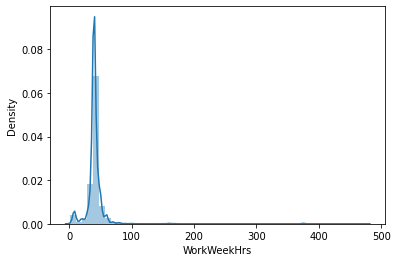

In [99]:
sns.distplot(data['WorkWeekHrs'])

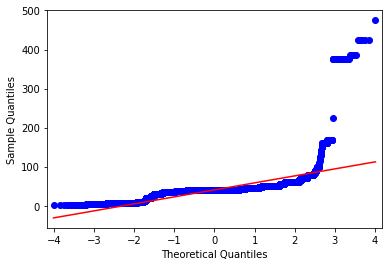

In [57]:
qqplot(data['WorkWeekHrs'], line='s')
plt.show()

In [141]:
years_code = data['YearsCode']
years_code = years_code.replace('Less than 1 year',0.5)
years_code = years_code.replace('More than 50 years',55)
years_code = pd.to_numeric(years_code)
years_code = years_code[years_code>0]
data.drop(['YearsCode'], axis=1)
data['YearsCode'] = years_code

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsCode', ylabel='Density'>

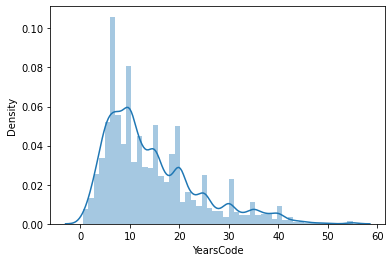

In [103]:
sns.distplot(data['YearsCode'])

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ConvertedComp', ylabel='Density'>

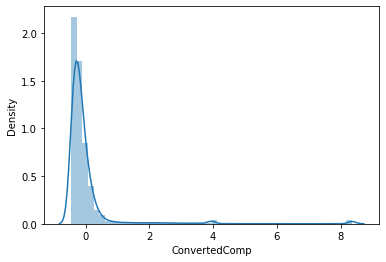

In [146]:
sns.distplot(data['ConvertedComp'])

<AxesSubplot:>

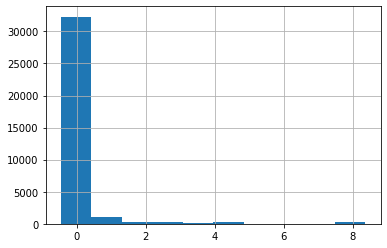

In [147]:
data['ConvertedComp'].hist()

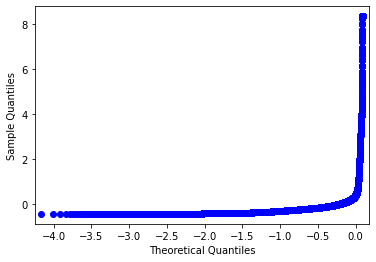

In [279]:
qqplot(data['ConvertedComp'], line='s')
plt.show()

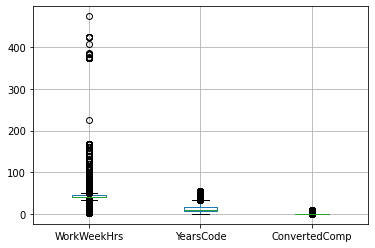

In [149]:
boxplot = data.boxplot(column=['WorkWeekHrs', 'YearsCode', 'ConvertedComp'])

<AxesSubplot:xlabel='ConvertedComp'>

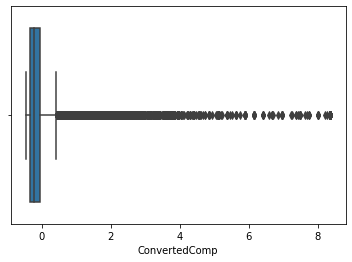

In [150]:
sns.boxplot(x=data['ConvertedComp'])

In [151]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ConvertedComp     0.310077
WorkWeekHrs       4.000000
YearsCode        11.000000
dtype: float64


In [274]:
data_cal = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_cal.shape

(53053, 3)

<AxesSubplot:xlabel='ConvertedComp'>

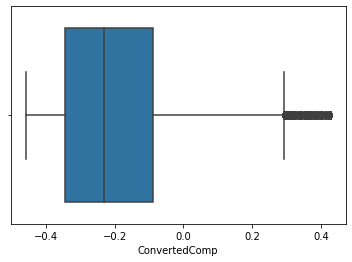

In [166]:
sns.boxplot(x=data_cal['ConvertedComp'])

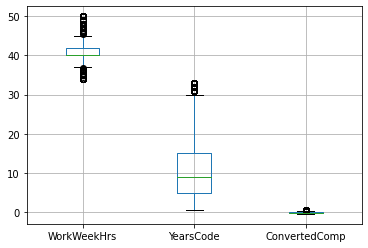

In [167]:
boxplot = data_cal.boxplot(column=['WorkWeekHrs', 'YearsCode', 'ConvertedComp'])

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ConvertedComp', ylabel='Density'>

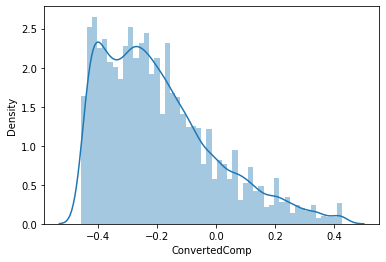

In [168]:
sns.distplot(data_cal['ConvertedComp'])

<ipython-input-275-7ae67c46491c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cal['ConvertedComp']+=np.exp(data_cal['ConvertedComp'])
<ipython-input-275-7ae67c46491c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cal['ConvertedComp']+=np.log(data_cal['ConvertedComp'])
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use ei

<AxesSubplot:xlabel='ConvertedComp', ylabel='Density'>

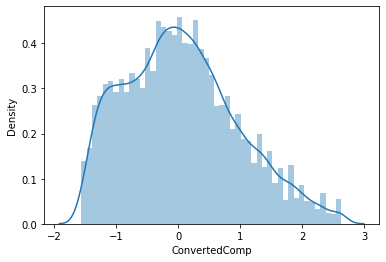

In [275]:
# data_cal['ConvertedComp']=data_cal['ConvertedComp']**(.5)
data_cal['ConvertedComp']+=np.exp(data_cal['ConvertedComp'])
data_cal['ConvertedComp']+=np.log(data_cal['ConvertedComp'])
sns.distplot(data_cal['ConvertedComp'])

<ipython-input-281-efa3451ba964>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cal['ConvertedComp']=data_cal['ConvertedComp']**(.5)
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ConvertedComp', ylabel='Density'>

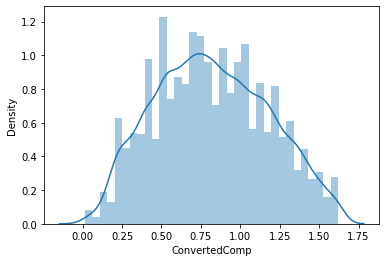

In [281]:
data_cal['ConvertedComp']=data_cal['ConvertedComp']**(.5)
sns.distplot(data_cal['ConvertedComp'])

In [271]:
model = ols('ConvertedComp ~ C(WorkWeekHrs) + C(YearsCode) + C(WorkWeekHrs):C(YearsCode)', data=data_cal).fit()
sm.stats.anova_lm(model, typ=2) 

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 38, but rank is 12
  warnings.warn('covariance of constraints does not have full '
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 11
  warnings.warn('covariance of constraints does not have full '
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1254, but rank is 6
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(WorkWeekHrs),0.000003,38.0,7.836630e-08,1.000000
C(YearsCode),-46.449026,33.0,-1.376464e+00,1.000000
C(WorkWeekHrs):C(YearsCode),1563.187182,1254.0,1.219033e+00,0.292808
Residual,24967.349193,24416.0,NaN,NaN
